In [1]:
import numpy as np
from glob import glob
import os
import re
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from Bayes import Naive_Bayes
from LogisticReg import LogisticRegression

In [2]:

def open_file(file): #epistrefw kathe fora mia lista me tis lexeis enos review
    with open(file,'r',encoding="utf8") as f:
        lines=preProcessText(f.readlines())        
        splitted = lines[0].split()
    return splitted

def add_words(lines,di): #methodos pou prosthetei sto dictionary tis lexeis enos review
        splitted=open_file(lines)
        for w in splitted:            
            if w in di:
                di[w] = di[w] + 1
            else:
                di[w] = 1

def preProcessText (lines):  #vgazoume tous eidikous xarakthres(opws teleies kommata klp.) gia na exw kalytero accuracy                                         
    lines = [line.replace("<br /><br />", ' ') for line in lines]         
    lines = [line.replace("'", '')  for line in lines]                   
    lines = [re.sub('[\W_]+', ' ', line)  for line in lines]              
    lines = [line.lower() for line in lines]
    return lines

def encrypt_reviews(lines, di, m,n): #anaparastash review me 0,1 
    splitted = open_file(lines)
    new_dict = di[n:m]
    review_vec=np.zeros(len(new_dict),dtype = int)
    index = 0
    for word in new_dict:
        if word in splitted:
            review_vec[index] = 1
        index+=1    
    return review_vec
  
    

def create_dict():                              
    di = dict()
    okvoc=[]
    
    #if you have a problem with the path go to the bottom of this file this file
    path = os.getcwd()+r'\aclImdb\train\pos'
    os.chdir(path)
    print(path)
    for file in tqdm(os.listdir()):       
        file_path = f"{path}\{file}"
        add_words(file_path,di)
        
    path = os.path.dirname(path)+r'\neg'
    os.chdir(path)
    print(path)
    for file in tqdm(os.listdir()):       
        file_path = f"{path}\{file}"
        add_words(file_path,di)
       
        
    sort_dict = sorted(di.items(), key=lambda x: x[1], reverse=True) #sort the vocabulary
    for t in sort_dict:                         #get the words only 
        okvoc.append(t[0])
    return okvoc


        
        
di = create_dict()    
       
    

C:\Users\User\Downloads\iwn\Text_Classification\aclImdb\train\pos


100%|██████████| 12500/12500 [00:09<00:00, 1267.62it/s]


C:\Users\User\Downloads\iwn\Text_Classification\aclImdb\train\neg


100%|██████████| 12500/12500 [00:08<00:00, 1554.28it/s]


In [4]:
#ta duo telika vec ta kanw shuffle gia to kalytero f1 score
#anaparastash train kai test dedomenwn se 0,1 gia ola ta dedomena
#prepei na ginei allagh twn path analogws ton ypologisth
#ftiaxnw  (2).np arrays X_train,X_test me ta samples kai analoga kathe fora to n kai m exw m-n features(dictionary)
#ftiaxnw  (2).np array y_train,y_test me ta apotelesmata twn dedomenwn analogws an afta vriskontai ston fakelo neg h pos.
X_test1 = list()
y_test = list()

path = os.getcwd()
os.chdir(path)
print(path)
for file in tqdm(os.listdir()):       
    file_path = f"{path}\{file}"
    t=encrypt_reviews(file_path,di,1000,15)
    t = np.append(t,0)
    X_test1.append(t)
        
path = os.path.dirname(path)+r'\pos' #anoigw ola ta .txt arxeia twn pos reviews
os.chdir(path)
print(path)
for file in tqdm(os.listdir()):       
    file_path = f"{path}\{file}"
    t=encrypt_reviews(file_path,di,1000,15)
    t = np.append(t,1)
    X_test1.append(t)        
X_test1 = np.array(X_test1)



np.random.shuffle(X_test1)
for x in X_test1:
    y_test.append(x[-1])
y_test = np.array(y_test)
X_test = list()
for x in range(len(X_test1)):
    X_test.append(np.delete(X_test1[x],-1))
X_test = np.array(X_test)    
    
X_train1 = list()
y_train = list()
path = os.path.dirname(path)+r'\neg' #anoigw ola ta .txt arxeia ton neg reviews
os.chdir(path)
print(path)
for file in tqdm(os.listdir()):       
    file_path = f"{path}\{file}"
    t = encrypt_reviews(file_path,di,1000,15)
    t = np.append(t,0)
    X_train1.append(t)
        
path = os.path.dirname(path)+r'\pos' #anoigw ola ta .txt arxeia twn pos reviews
os.chdir(path)
print(path)
for file in tqdm(os.listdir()):       
    file_path = f"{path}\{file}"
    t = encrypt_reviews(file_path,di,1000,15)
    t = np.append(t,1)
    X_train1.append(t)
    
X_train1 = np.array(X_train1)


    
np.random.shuffle(X_train1)
for x in X_train1:
    y_train.append(x[-1])
y_train = np.array(y_train)
X_train = list()
for x in range(len(X_train1)):
    X_train.append(np.delete(X_train1[x],-1))

X_train = np.array(X_train)
y_train = np.array(y_train)

C:\Users\User\Downloads\iwn\Text_Classification\aclImdb\train\neg


100%|██████████| 12500/12500 [00:35<00:00, 353.95it/s]


C:\Users\User\Downloads\iwn\Text_Classification\aclImdb\train\pos


100%|██████████| 12500/12500 [00:48<00:00, 256.32it/s]


C:\Users\User\Downloads\iwn\Text_Classification\aclImdb\train\neg


100%|██████████| 12500/12500 [00:35<00:00, 352.97it/s]


C:\Users\User\Downloads\iwn\Text_Classification\aclImdb\train\pos


100%|██████████| 12500/12500 [00:36<00:00, 345.12it/s]


In [11]:
nb = Naive_Bayes()
nb.fit(X_train,y_train)
pred = nb.predict(X_test)
print("Classification report for Naive Bayes")
print(classification_report(y_test,pred))


lr = LogisticRegression(learning = 0.001, iterations = 1000 )
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print("Classification report for Logistic Regression")
print(classification_report(y_test,pred))

Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     12500
           1       0.82      0.84      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000

Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.87      0.80     12500
           1       0.84      0.70      0.76     12500

    accuracy                           0.78     25000
   macro avg       0.79      0.78      0.78     25000
weighted avg       0.79      0.78      0.78     25000



Metrics for Naive Bayes


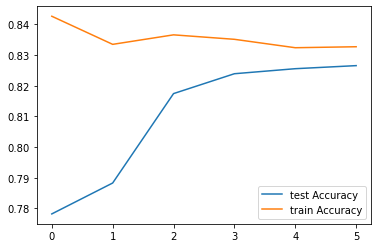

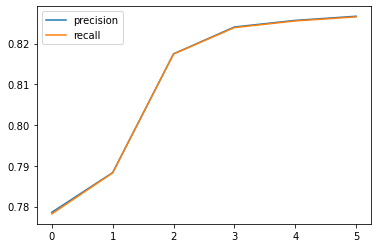

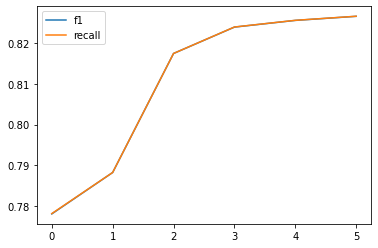

Metrics for Logistic Regression


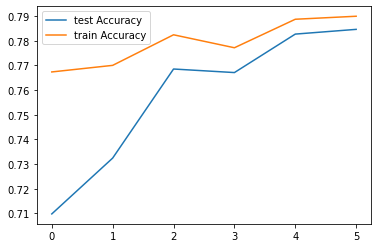

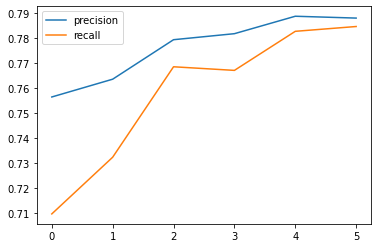

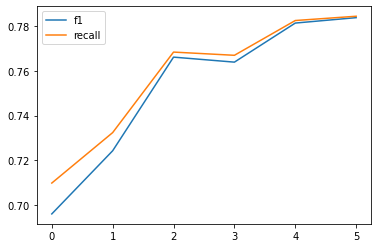

In [8]:
def predictBayes(X_train, y_train, X_test):
    nb = Naive_Bayes()
    nb.fit(X_train, y_train)
    return nb.predict(X_test)
def predictLogistic(X_train, y_train, X_test):
    lr = LogisticRegression(learning = 0.001, iterations = 1000 )
    lr.fit(X_train, y_train)
    return lr.predict(X_test)

def getMetrics(X_train, y_train, X_test,algorithm):
    test = []
    train = []
    precision = []
    recall = []
    f1 = []
    
    if(algorithm == "Bayes"):
        for i in [1500,2000,5000,7000,10000,12500]:
            bayesPredictions = predictBayes(X_train[:i],y_train[:i],X_test)
            test.append(metrics.accuracy_score(y_test,bayesPredictions))
            train.append(metrics.accuracy_score(y_train[:i],
                                                predictBayes(X_train[:i],
                                                            y_train[:i],
                                                            X_train[:i])))
            calc = metrics.precision_recall_fscore_support(y_test,bayesPredictions,average = 'weighted' , labels = np.unique(bayesPredictions))
            precision.append(calc[0])
            recall.append(calc[1])
            f1.append(calc[2])
    elif(algorithm == "Logistic"):
        for i in [1500,2000,5000,7000,10000,12500]:
            logisticPredictions = predictLogistic(X_train[:i],y_train[:i],X_test)
            test.append(metrics.accuracy_score(y_test,logisticPredictions))
            train.append(metrics.accuracy_score(y_train[:i],
                                                predictLogistic(X_train[:i],
                                                                y_train[:i],
                                                                X_train[:i])))
            calc = metrics.precision_recall_fscore_support(y_test,logisticPredictions,average = 'weighted' , labels = np.unique(logisticPredictions))
            precision.append(calc[0])
            recall.append(calc[1])
            f1.append(calc[2])
        
    precision = np.array(precision)
    recall = np.array(recall)
    f1 = np.array(f1)
    plt.plot(range(len(test)),test,label="test Accuracy")
    plt.plot(range(len(train)),train,label="train Accuracy")
    plt.legend()
    plt.show()
    
    plt.plot(range(len(precision)),precision,label="precision")
    plt.plot(range(len(recall)),recall,label="recall")
    plt.legend()
    plt.show()
    
    plt.plot(range(len(f1)),f1,label="f1")
    plt.plot(range(len(recall)),recall,label="recall")
    plt.legend()
    plt.show()
    
print("Metrics for Naive Bayes")
getMetrics(X_train, y_train, X_test,"Bayes")  

print("Metrics for Logistic Regression")
getMetrics(X_train, y_train, X_test,"Logistic")      

